<center>

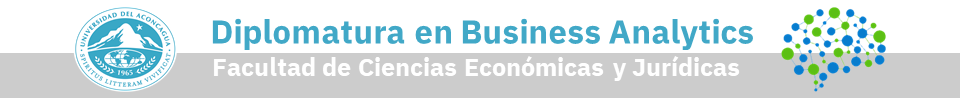

</center>

<center>
<font color="#41a8c7">
<h2><b>
Código Trabajo Final - Caso Predicción de compra - Customer propensity to purchase

</font>
</center>

Alumno: Matías Gómez Ocampo

#***Introducción***

Antes de iniciar el presente trabajo quería agradecer a los docentes de la diplomatura (Cristian, Gustavo, Luca, Pablo, Fernando, Emiliano, Santiago), todavía no puedo creer que este codeando. Muchas gracias!

En el presente trabajo voy a tratar de desarrollar un algoritmo de machine learning, no supervisado, a través de la clusterización de un conjunto de datos dado.
Mi idea es lograr segmentos homogéneos de clientes sobre los que podamos inferir características comunes que nos permitan realizar campañas o acciones de marketing enfocadas, lo que nos permitan una mayor fidelización con los mismos y un gasto más eficiente de dichas acciones.


# Acceso al trabajo desde Github

[LINK GITHUB](https://github.com/matizion/CursoBusinessIntelligence/blob/main/TrabajoFinalBA.ipynb)

## Descripción del dataset

**El dataset pertenece a una compañía que tiene una tienda en su página web.**

**Que tan propenso a comprar puede ser un cliente potencial es muy importante para realizar acciones en el momento y campañas de re-target que aumenten el beneficio de la organización y optimizar el gasto de marketing.**


---

Administrative: El número de páginas administrativas que ha visitado el usuario.

Administrative_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

Informational: El número de páginas de información que ha visitado el usuario.

Informational_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

ProductRelated: El número de páginas de Producto que ha visitado el usuario.

ProductRelated_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

BounceRates: Porcentaje de visitantes que entran a la web mediante la página que se ingresó.

ExitRates: Porcentaje de vistas de página que terminan en la página por la que se ingresó.

PageValues: Valoración interna de la página.

SpecialDay: Cercanía en el tiempo a un día festivo.

Month: Mes.

OperatingSystems: Sistema operativo.

Browser: Navegador.

Region: Region.

TrafficType: Tipo de tráfico.

VisitorType: Tipo de visitante (nuevo o recurrente).

Weekend: True/False si es fin de semana.

Revenue: True/False si el cliente ha comprado.







# Carga de módulos

In [1]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd #Carga de módulos necesarios para realizar un intento de EDA 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pycaret.clustering import *

# Dataframe

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/Clientes_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/Clientes_test.csv")

# EDA (Exploratory Data Analysis) de los datos de entrenamiento - TRAIN

Previo a modelar, realizo un análisis de los datos de entrenamiento

In [4]:
train.info() #arraco con un info para ver el tipo de datos que tiene cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9248 entries, 0 to 9247
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               9248 non-null   int64  
 1   Administrative           9248 non-null   int64  
 2   Administrative_Duration  9248 non-null   float64
 3   Informational            9248 non-null   int64  
 4   Informational_Duration   9248 non-null   float64
 5   ProductRelated           9248 non-null   int64  
 6   ProductRelated_Duration  9248 non-null   float64
 7   BounceRates              9248 non-null   float64
 8   ExitRates                9248 non-null   float64
 9   PageValues               9248 non-null   float64
 10  SpecialDay               9248 non-null   float64
 11  Month                    9248 non-null   object 
 12  OperatingSystems         9248 non-null   int64  
 13  Browser                  9248 non-null   int64  
 14  Region                  

In [5]:
train.shape #veo el tamaño del dataframe

(9248, 19)

In [6]:
train.head(3) #visualizo los primeros 3 registros

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,13,649.25,0.0,0.015385,0.0,0.0,Feb,2,2,1,5,New_Visitor,False,False
1,1,3,96.0,0,0.0,11,565.00,0.0,0.011111,0.0,0.0,May,3,2,6,14,New_Visitor,True,False
2,2,0,0.0,0,0.0,4,25.00,0.0,0.100000,0.0,0.0,May,2,2,3,3,Returning_Visitor,False,False


In [7]:
train.tail(3) #visualizo los últimos 3 registros

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9245,9245,5,36.0,0,0.0,237,6817.942235,0.001674,0.013806,3.960306,0.0,Nov,2,2,1,3,Returning_Visitor,False,True
9246,9246,4,69.0,1,0.0,19,580.500000,0.010526,0.049123,22.329347,0.0,May,2,2,1,3,Returning_Visitor,True,True
9247,9247,0,0.0,0,0.0,8,135.833333,0.000000,0.025000,0.000000,0.4,May,2,2,9,3,Returning_Visitor,False,False


In [8]:
train= train.drop(train.columns[[0]], axis='columns') #elimino la columna unnamed que aparentemente es un índice

In [9]:
train= train.drop(columns=['Month','Weekend', 'SpecialDay','PageValues'])

Elimino las columnas month, weekend y SpecialDay dado que no las considero relevante para segmentar clientes. Probablemente las consideraría si quisiera hacer un análisis sobre la estacionalidad de las compras. PageValue entiendo que es una valoración propia de la página y no de los clientes por lo que no me parece conveniente mantenerla.

In [10]:
train.info() #info después de dropear la columna que no servía

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9248 entries, 0 to 9247
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9248 non-null   int64  
 1   Administrative_Duration  9248 non-null   float64
 2   Informational            9248 non-null   int64  
 3   Informational_Duration   9248 non-null   float64
 4   ProductRelated           9248 non-null   int64  
 5   ProductRelated_Duration  9248 non-null   float64
 6   BounceRates              9248 non-null   float64
 7   ExitRates                9248 non-null   float64
 8   OperatingSystems         9248 non-null   int64  
 9   Browser                  9248 non-null   int64  
 10  Region                   9248 non-null   int64  
 11  TrafficType              9248 non-null   int64  
 12  VisitorType              9248 non-null   object 
 13  Revenue                  9248 non-null   bool   
dtypes: bool(1), float64(5), 

In [11]:
train.isna().sum().sort_values() #busco nulos, aparentemente el dataframe no tiene nulos

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Revenue                    0
dtype: int64

In [12]:
train.drop_duplicates(inplace=True) #dropeo duplicados

In [13]:
train.dropna(axis=0, inplace = True) #dropeo las filas con valores faltantes

In [14]:
train.shape #veo el nuevo tamaño del df sin duplicados ni filas con datos faltantes

(9019, 14)

In [15]:
round(train.describe().T, 2) #análisis estadístico del df

,count,mean,std,min,25%,50%,75%,max
Administrative,9019.0,2.38,3.33,0.0,0.00,1.00,4.00,27.00
Administrative_Duration,9019.0,84.10,180.01,0.0,0.00,12.00,97.55,3398.75
Informational,9019.0,0.52,1.27,0.0,0.00,0.00,0.00,24.00
Informational_Duration,9019.0,35.92,144.45,0.0,0.00,0.00,0.00,2549.38
ProductRelated,9019.0,32.38,44.71,0.0,8.00,18.00,38.00,705.00
ProductRelated_Duration,9019.0,1220.42,1959.31,0.0,204.75,623.08,1501.08,63973.52
BounceRates,9019.0,0.02,0.04,0.0,0.00,0.00,0.02,0.20
ExitRates,9019.0,0.04,0.04,0.0,0.01,0.02,0.05,0.20
OperatingSystems,9019.0,2.12,0.91,1.0,2.00,2.00,3.00,8.00
Browser,9019.0,2.36,1.72,1.0,2.00,2.00,2.00,13.00


In [16]:
train.select_dtypes(include=['object', 'bool']).describe().T

,count,unique,top,freq
VisitorType,9019,3,Returning_Visitor,7700
Revenue,9019,2,False,7571


Buen dato que más del 80% de las personas que visitan la página no compran

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9019 entries, 0 to 9247
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9019 non-null   int64  
 1   Administrative_Duration  9019 non-null   float64
 2   Informational            9019 non-null   int64  
 3   Informational_Duration   9019 non-null   float64
 4   ProductRelated           9019 non-null   int64  
 5   ProductRelated_Duration  9019 non-null   float64
 6   BounceRates              9019 non-null   float64
 7   ExitRates                9019 non-null   float64
 8   OperatingSystems         9019 non-null   int64  
 9   Browser                  9019 non-null   int64  
 10  Region                   9019 non-null   int64  
 11  TrafficType              9019 non-null   int64  
 12  VisitorType              9019 non-null   object 
 13  Revenue                  9019 non-null   bool   
dtypes: bool(1), float64(5), 

# Análisis de los valores por columna del DF TRAIN

Dado que he decido encarar un modelo de clustering y conforme lo indicado por Gustavo y Cristian "al clustering no le gustan los outliers" procedo a dropearlos del modelo.
Para esto voy a hacer un boxplot y voy a sacar los datos que queden por arriba del upper fence y los que queden por debajo del lower fence.


## Columna Mes (Borrada)

In [18]:
#train.Month.unique()

In [19]:
#transformo las variables object de mes a numérica
#train['Month'] = train['Month'].replace(['Feb'],2)
#train['Month'] = train['Month'].replace(['Mar'],3)
#train['Month'] = train['Month'].replace(['May'],5)
#train['Month'] = train['Month'].replace(['June'],6)
#train['Month'] = train['Month'].replace(['Jul'],7)
#train['Month'] = train['Month'].replace(['Aug'],8)
#train['Month'] = train['Month'].replace(['Sep'],9)
#train['Month'] = train['Month'].replace(['Oct'],10)
#train['Month'] = train['Month'].replace(['Nov'],11)
#train['Month'] = train['Month'].replace(['Dec'],12)

## Columna Administrative: El número de páginas administrativas que ha visitado el usuario.

In [20]:
train.Administrative.unique()

array([ 0,  3,  7,  4,  2,  1,  9,  5, 11, 10,  8,  6, 15, 13, 12, 18, 14,
       20, 16, 21, 22, 17, 19, 23, 24, 27])

In [21]:
px.box(train,
       x = train.Administrative,
       template = "gridon")

In [22]:
train.drop(train[train.Administrative > 10].index, axis=0, inplace = True)

## Columna Administrative_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

In [23]:
train.Administrative_Duration.unique()

array([  0.       ,  96.       , 133.4666667, ..., 588.2972222,
       206.6      , 405.1666667])

In [24]:
px.box(train,
       x = train.Administrative_Duration,
       template = "gridon"
       )

In [25]:
train.drop(train[train.Administrative_Duration > 214.78].index, axis=0, inplace = True)

##Columna Informational: El número de páginas de información que ha visitado el usuario.

In [26]:
train.Informational.unique() 

array([ 0,  4,  2,  1,  5,  9,  3, 14,  6,  7, 10,  8, 12, 11])

##Columna Informational_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

In [27]:
train.Informational_Duration.unique() 

array([0.00000000e+00, 4.65000000e+01, 2.20000000e+01, 7.00000000e+00,
       1.51666667e+02, 1.77916667e+03, 1.14500000e+02, 8.60000000e+01,
       2.37500000e+01, 1.30000000e+01, 1.40000000e+02, 2.97200000e+02,
       1.84666667e+01, 9.00000000e+00, 1.01666667e+01, 5.30000000e+01,
       5.05000000e+01, 2.18000000e+01, 8.90000000e+01, 3.83000000e+01,
       6.35000000e+01, 1.90000000e+01, 1.63600000e+03, 1.70000000e+01,
       1.48500000e+02, 2.05000000e+01, 3.72000000e+01, 9.25000000e+01,
       2.60000000e+01, 5.00800000e+02, 7.46000000e+01, 5.23333333e+01,
       3.20000000e+01, 5.10000000e+01, 2.80000000e+01, 1.82200000e+02,
       2.19530000e+03, 2.34500000e+02, 1.62000000e+01, 5.15000000e+01,
       4.18500000e+02, 1.18000000e+02, 1.01000000e+02, 6.20000000e+01,
       8.00000000e+00, 6.96200000e+02, 1.04800000e+02, 5.00000000e+00,
       1.90416667e+02, 8.02500000e+02, 2.18250000e+02, 1.00000000e+01,
       4.57500000e+01, 9.34166667e+01, 7.24000000e+02, 1.10000000e+01,
      

In [28]:
px.histogram(train,
             x = train.Informational_Duration,
             marginal="box",
             template = "gridon")

In [29]:
train.drop(train[train.Informational_Duration < 0].index, axis=0, inplace = True)

El tiempo que los usuarios están en este tipo de páginas no debería ser negativo.

## Columna ProductRelated: El número de páginas de Producto que ha visitado el usuario.

In [30]:
train.ProductRelated.unique() 

array([ 13,  11,   4,  26,   9,  31,  25,  21,   7,  19,  16,  12,  18,
         2,  23,  35,   3,  48,  24,  54,  60,  30,   0,  15,  17,  14,
        10,   5,  62,   8,  32,  45, 155,   1,  85,  34,  57,   6,  40,
        29,  27,  78,  56,  43, 148,  36,  28,  49,  64,  53,  70,  33,
        46,  51,  39,  22,  63, 126,  88,  82,  81,  50,  42,  41,  47,
        37,  20,  83,  76,  59, 116, 132,  75,  58, 122, 141, 283,  89,
        55, 102,  68,  38,  98,  69,  44,  61, 151,  94, 423,  93, 110,
       315,  67, 111, 130, 104, 339, 145, 114, 125, 118, 109, 272, 251,
        74, 143, 246, 346, 195,  65, 103, 137,  71,  80,  95, 138,  79,
        96,  52,  72, 113, 167,  99, 230,  66, 204,  77,  90, 124,  73,
       119,  87, 171, 157, 326,  86,  84, 134, 108, 106, 117, 100, 200,
       281,  91, 133, 162, 391, 174, 149, 192, 271, 179, 245, 120, 156,
       260, 128, 101, 233, 282, 159, 227, 136, 131, 199, 330, 105, 160,
       216, 154, 146, 144, 161, 140, 135,  97, 290, 286, 310, 11

In [31]:
px.histogram(train,
             x = train.ProductRelated,
             marginal="box",
             template = "gridon")

In [32]:
train.drop(train[train.ProductRelated > 83].index, axis=0, inplace = True)

## Columna ProductRelated_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

In [33]:
train.ProductRelated_Duration.unique() 

array([ 649.25     ,  565.       ,   25.       , ..., 1952.75     ,
        411.5      ,  135.8333333])

In [34]:
px.histogram(train,
             x = train.ProductRelated_Duration,
             marginal="box",
             template = "gridon")

In [35]:
train.drop(train[train.ProductRelated_Duration > 2735.729].index, axis=0, inplace = True)

## Columna BounceRates: Porcentaje de visitantes que entran a la web mediante la página que se ingresó.

In [36]:
train.BounceRates.unique() 

array([0.        , 0.03030303, 0.01190476, 0.02857143, 0.02727273,
       0.00333333, 0.00740741, 0.00701754, 0.04545454, 0.03478261,
       0.03847826, 0.015     , 0.02222222, 0.025     , 0.00754717,
       0.00666667, 0.01052632, 0.01176471, 0.01666667, 0.00689655,
       0.0469697 , 0.03888889, 0.0125    , 0.01981982, 0.2       ,
       0.01828571, 0.01304348, 0.02722222, 0.00588235, 0.01034483,
       0.01333333, 0.01      , 0.03703704, 0.00047281, 0.07413793,
       0.00697674, 0.03076923, 0.005     , 0.00258064, 0.00784314,
       0.1       , 0.04      , 0.00086956, 0.04285714, 0.00318841,
       0.01153846, 0.01155556, 0.02352941, 0.05      , 0.00714286,
       0.01724138, 0.01428571, 0.05333333, 0.075     , 0.02647059,
       0.024     , 0.00384615, 0.05238095, 0.00980392, 0.00833333,
       0.01071429, 0.03333333, 0.032     , 0.00869565, 0.0106383 ,
       0.08      , 0.00909091, 0.06666667, 0.01538462, 0.11428571,
       0.00526316, 0.01470588, 0.00380952, 0.00851064, 0.00952

In [37]:
px.histogram(train,
             x = train.BounceRates,
             marginal="box",
             template = "gridon")

In [38]:
train.drop(train[train.BounceRates > 0.045].index, axis=0, inplace = True)

## Columna ExitRates: Porcentaje de vistas de página que terminan en la página por la que se ingresó.

In [39]:
train.ExitRates.unique() 

array([0.01538462, 0.01111111, 0.1       , ..., 0.01522989, 0.06833333,
       0.04912281])

In [40]:
px.histogram(train,
             x = train.ExitRates,
             marginal="box",
             template = "gridon")

In [41]:
train.drop(train[train.ExitRates > 0.08].index, axis=0, inplace = True)

## Columna OperatingSystems: Sistema operativo.

In [42]:
train.OperatingSystems.unique()

array([2, 3, 1, 4, 8, 6, 7, 5])

In [43]:
train['OperatingSystems'].value_counts().sort_values(ascending=False)

2    3253
1    1290
3    1148
4     262
8      40
6       7
7       3
5       2
Name: OperatingSystems, dtype: int64

In [44]:
train['OperatingSystems'] = train['OperatingSystems'].replace([4,5,6,7,8],4)
train['OperatingSystems'].value_counts().sort_values(ascending=False)

2    3253
1    1290
3    1148
4     314
Name: OperatingSystems, dtype: int64

In [45]:
px.histogram(train,
             x = train.OperatingSystems, 
             color_discrete_sequence=['grey'],
             template = 'gridon'                         
             )

Una buena variedad de OSs navegan por el e-commerce aparentemente pero los más usados son los primeros 3 (deberían ser Windows, Mac y Linux en un mundo ideal).
Agrupo en 4 el resto de los OSs dado que no son relevantes (sería un others tal cual vimos en clase con Cristian)

## Columna Browser: Navegador

In [46]:
train.Browser.unique()

array([ 2,  1,  5,  4,  8,  6, 10,  3, 13,  7, 12, 11])

In [47]:
train['Browser'].value_counts().sort_values(ascending=False)

2     3776
1     1244
4      378
5      246
6       92
10      85
8       74
3       48
13      32
7       26
12       2
11       2
Name: Browser, dtype: int64

In [48]:
train['Browser'] = train['Browser'].replace([3,4,5,6,7,8,9,10,11,12,13],3)
train['Browser'].value_counts().sort_values(ascending=False)

2    3776
1    1244
3     985
Name: Browser, dtype: int64

In [49]:
px.histogram(train,
             x = train.Browser, 
             color_discrete_sequence=['grey'],
             template = 'gridon'                         
             )

Tenemos varios browsers también pero hay dos que lideran ampliamente (siguiendo la suposición del OS, deberían ser Chrome y Safari, y después las cosas que usan los jipis de linux como Firefox).
Mismo caso que en OS, agrupamos los browsers del 3 al 13, dado que el impacto individual de cada uno de ellos es muy bajo.

##Columna Region

In [50]:
train.Region.unique() 

array([1, 6, 9, 3, 8, 2, 7, 4, 5])

In [51]:
px.histogram(train,
             x = train.Region, 
             color_discrete_sequence=['grey'],
             template = 'gridon'                         
             )

## Columna TrafficType 

In [52]:
train.TrafficType.unique()

array([ 5, 14,  2,  1,  4, 13, 10,  3,  6,  8, 20, 11,  9,  7, 18, 16, 15,
       19, 12])

In [53]:
train['TrafficType'].value_counts().sort_values(ascending=False)

2     2064
1     1085
3      963
4      559
13     252
10     228
6      211
8      173
5      153
11     133
20     100
7       27
9       21
19      11
15      10
14       7
18       5
16       2
12       1
Name: TrafficType, dtype: int64

In [54]:
train['TrafficType'] = train['TrafficType'].replace([7,9,11,12,14,15,16,17,18,19,20],7)
train['TrafficType'].value_counts().sort_values(ascending=False)

2     2064
1     1085
3      963
4      559
7      317
13     252
10     228
6      211
8      173
5      153
Name: TrafficType, dtype: int64

In [55]:
px.histogram(train,
             x = train.TrafficType, 
             color_discrete_sequence=['grey'],
             template = 'gridon'                         
             )

Mismo tratamiento que hice con OS y Browser para TrafficType, agrupo los tipos de tráfico que tienen un count menor a 150

## Columna VisitorType: Tipo de visitante (nuevo o recurrente).

In [56]:
train.VisitorType.unique()

array(['New_Visitor', 'Returning_Visitor', 'Other'], dtype=object)

In [57]:
px.histogram(train,
             x = train.VisitorType, 
             color_discrete_sequence=['indianred'])

Dato interesantísimo se desprende de este gráfico, la mayoría de la gente que visita la página es gente vuelve a la misma.
Comparando este dato con el datos siguiente Revenue, gente que finaliza la compra, observamos dónde está el problema de negocio.
Probablemente estemos ante el problema de marketing digital denominado carrito abandonado y es coincidente con estudios que indican que alredor del 70% de las personas que ingresan a una tienda online abandonan la compra.

## Columna Revenue: True/False si el cliente ha comprado

In [58]:
train.Revenue.unique()

array([False,  True])

In [59]:
px.histogram(train,
             x = train.Revenue, 
             color_discrete_sequence=['darkblue'])

##Codificación de variables categóricas

In [60]:
train = pd.get_dummies(train, columns=['VisitorType', 'Revenue'])

In [61]:
train.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue_False,Revenue_True
0,0,0.0,0,0.0,13,649.25,0.0,0.015385,2,2,1,5,1,0,0,1,0
1,3,96.0,0,0.0,11,565.00,0.0,0.011111,3,2,6,7,1,0,0,1,0


# EDA (Exploratory Data Analysis) de los datos de entrenamiento - TRAIN

Entiendo que a fin de mantener un criterio deberías realizar un EDA similar al que realicé con la df TEST en el df de entrenamiento, por lo que procedo por esa vía.

In [62]:
test.info() #arraco con un info para ver el tipo de datos que tiene cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3082 non-null   int64  
 1   Administrative           3082 non-null   int64  
 2   Administrative_Duration  3082 non-null   float64
 3   Informational            3082 non-null   int64  
 4   Informational_Duration   3082 non-null   float64
 5   ProductRelated           3082 non-null   int64  
 6   ProductRelated_Duration  3082 non-null   float64
 7   BounceRates              3082 non-null   float64
 8   ExitRates                3082 non-null   float64
 9   PageValues               3082 non-null   float64
 10  SpecialDay               3082 non-null   float64
 11  Month                    3082 non-null   object 
 12  OperatingSystems         3082 non-null   int64  
 13  Browser                  3082 non-null   int64  
 14  Region                  

In [63]:
test.shape #veo el tamaño del dataframe

(3082, 19)

In [64]:
test.head(3)

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
1,1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
2,2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False


In [65]:
test.tail(3)

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3079,3079,0,0.0,1,0.0,16,503.00,0.0,0.037647,0.0,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
3080,3080,4,75.0,0,0.0,15,346.00,0.0,0.021053,0.0,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
3081,3081,0,0.0,0,0.0,3,21.25,0.0,0.066667,0.0,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [66]:
test= test.drop(test.columns[[0]], axis='columns') #elimino la columna unnamed que aparentemente es un índice

In [67]:
test= test.drop(columns=['Month','Weekend', 'SpecialDay','PageValues'])

In [68]:
test.info() #info después de dropear la columna que servía

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           3082 non-null   int64  
 1   Administrative_Duration  3082 non-null   float64
 2   Informational            3082 non-null   int64  
 3   Informational_Duration   3082 non-null   float64
 4   ProductRelated           3082 non-null   int64  
 5   ProductRelated_Duration  3082 non-null   float64
 6   BounceRates              3082 non-null   float64
 7   ExitRates                3082 non-null   float64
 8   OperatingSystems         3082 non-null   int64  
 9   Browser                  3082 non-null   int64  
 10  Region                   3082 non-null   int64  
 11  TrafficType              3082 non-null   int64  
 12  VisitorType              3082 non-null   object 
 13  Revenue                  3082 non-null   bool   
dtypes: bool(1), float64(5), 

In [69]:
test.isna().sum().sort_values() #busco nulos, aparentemente el dataframe no tiene nulos

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Revenue                    0
dtype: int64

In [70]:
test.drop_duplicates(inplace=True) #dropeo duplicados

In [71]:
test.dropna(axis=0, inplace = True) #dropeo las filas con valores faltantes

In [72]:
test.shape

(3038, 14)

In [73]:
round(test.describe().T, 2) #análisis estadístico del df test

,count,mean,std,min,25%,50%,75%,max
Administrative,3038.0,2.34,3.37,0.0,0.00,1.00,4.00,26.00
Administrative_Duration,3038.0,78.35,173.26,0.0,0.00,7.50,91.44,2407.42
Informational,3038.0,0.51,1.31,0.0,0.00,0.00,0.00,16.00
Informational_Duration,3038.0,33.27,135.47,0.0,0.00,0.00,0.00,2256.92
ProductRelated,3038.0,32.55,44.82,0.0,7.00,19.00,39.00,518.00
ProductRelated_Duration,3038.0,1225.89,1826.59,0.0,197.60,631.70,1488.08,23050.10
BounceRates,3038.0,0.02,0.04,0.0,0.00,0.00,0.02,0.20
ExitRates,3038.0,0.04,0.04,0.0,0.01,0.02,0.05,0.20
OperatingSystems,3038.0,2.13,0.92,1.0,2.00,2.00,2.00,8.00
Browser,3038.0,2.35,1.69,1.0,2.00,2.00,2.00,13.00


In [74]:
test.select_dtypes(include=['object', 'bool']).describe().T

,count,unique,top,freq
VisitorType,3038,3,Returning_Visitor,2585
Revenue,3038,2,False,2578


Misma observación que el dataset Train, el 84% de las personas no nos compra :(, pero la gente vuelve a nuestra página.

## Realizo las mismas agrupaciones que hice el dataset TRAIN

In [75]:
test['OperatingSystems'] = test['OperatingSystems'].replace([4,5,6,7,8],4)
test['OperatingSystems'].value_counts().sort_values(ascending=False)

2    1665
1     619
3     593
4     161
Name: OperatingSystems, dtype: int64

In [76]:
test['Browser'] = test['Browser'].replace([3,4,5,6,7,8,9,10,11,12,13],3)
test['Browser'].value_counts().sort_values(ascending=False)

2    1987
1     584
3     467
Name: Browser, dtype: int64

# Análisis de los valores por columna del DF TEST

Para realizar una visualizacón de los datos del DF voy a usar la herramienta de Auto EDA de sweetviz

In [77]:
pip install sweetviz --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import sweetviz as sv

In [79]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [80]:
auto_EDA = sv.analyze(test)

                                             |          | [  0%]   00:00 -> (? left)


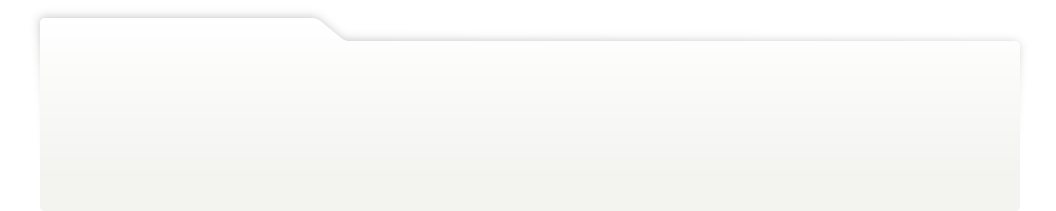
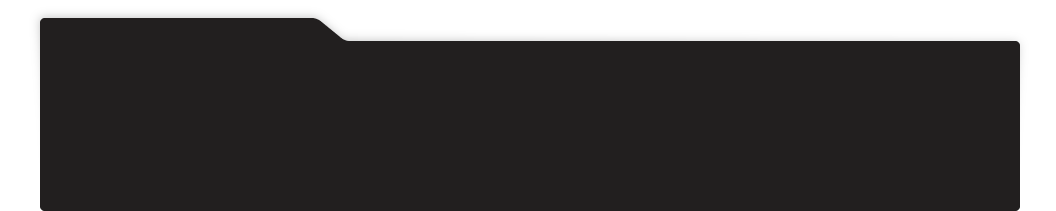
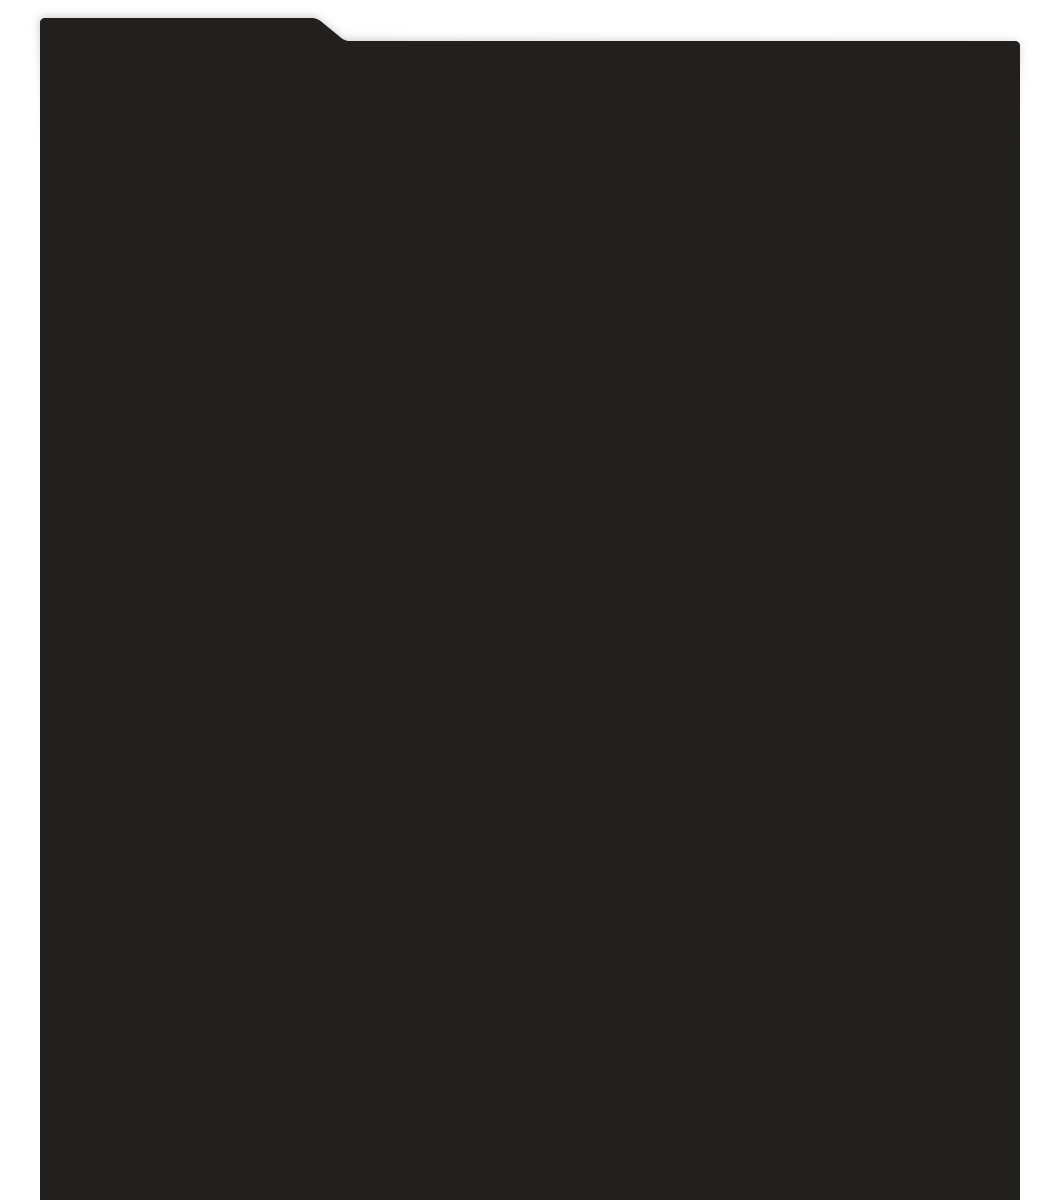
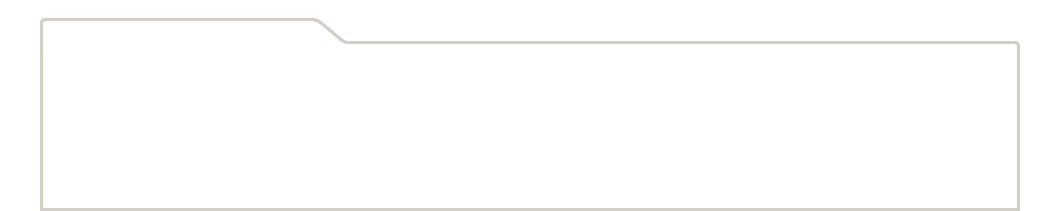
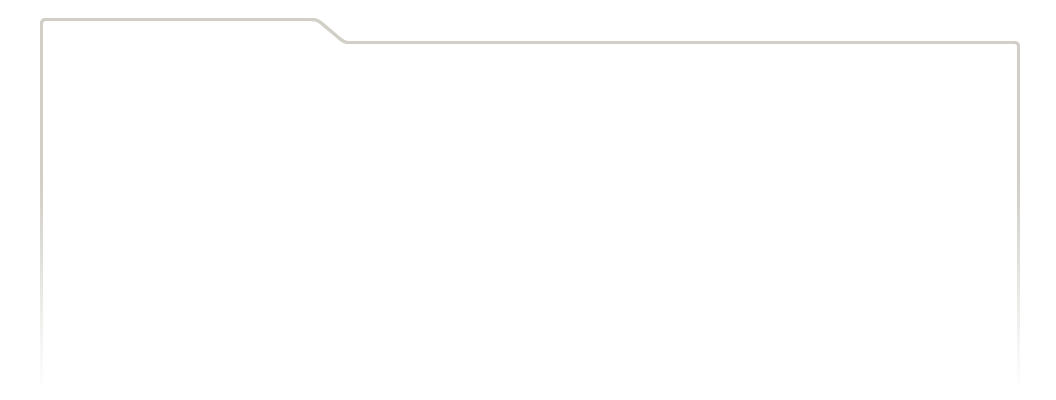
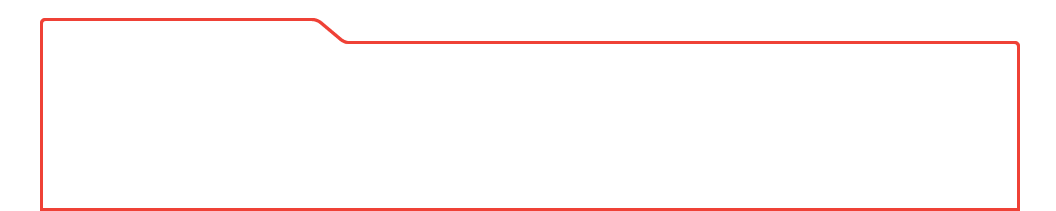
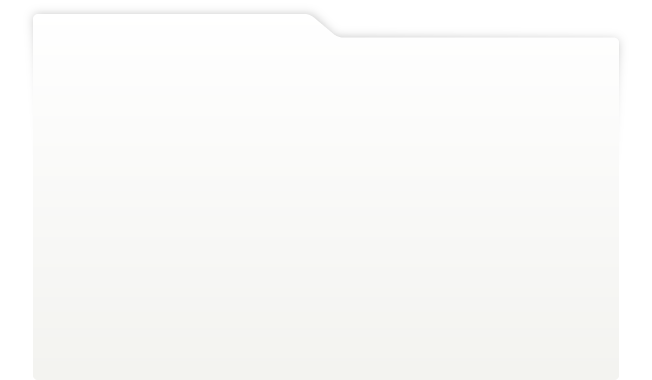
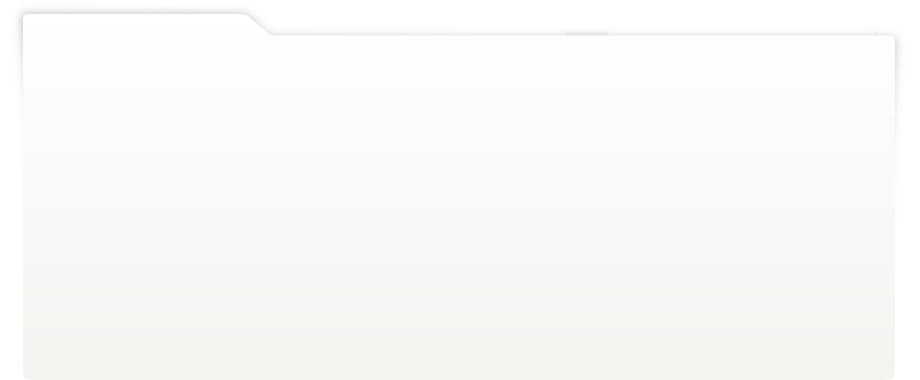
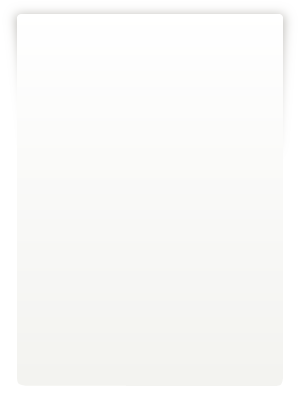
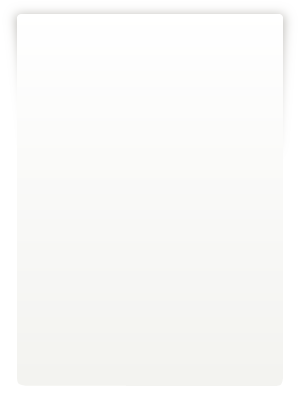
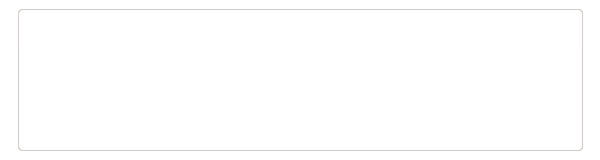
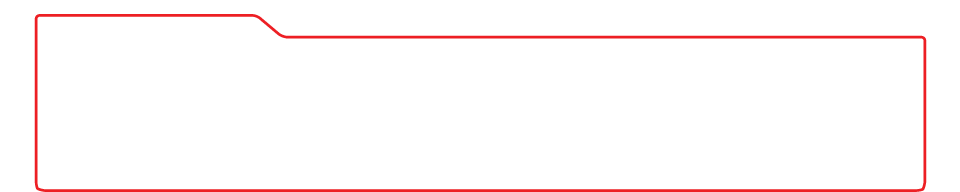
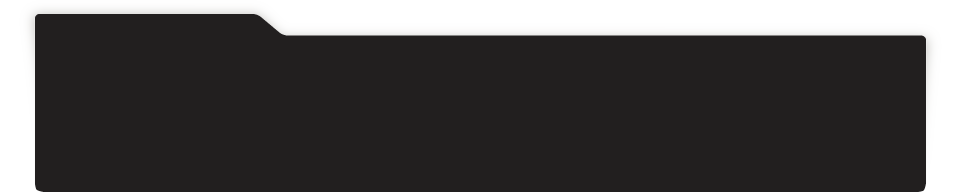
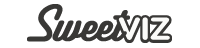
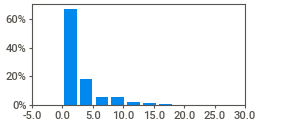
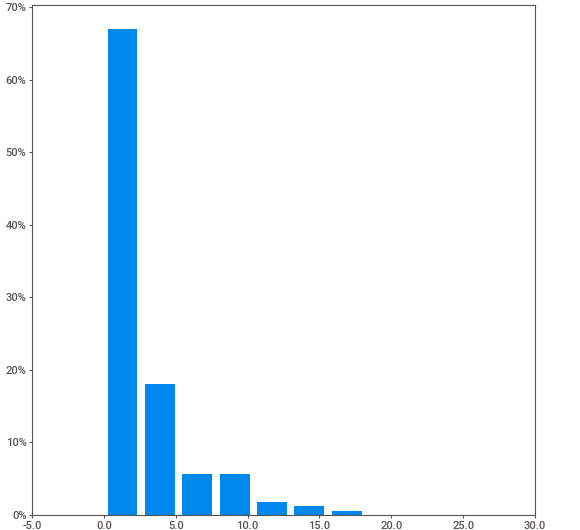
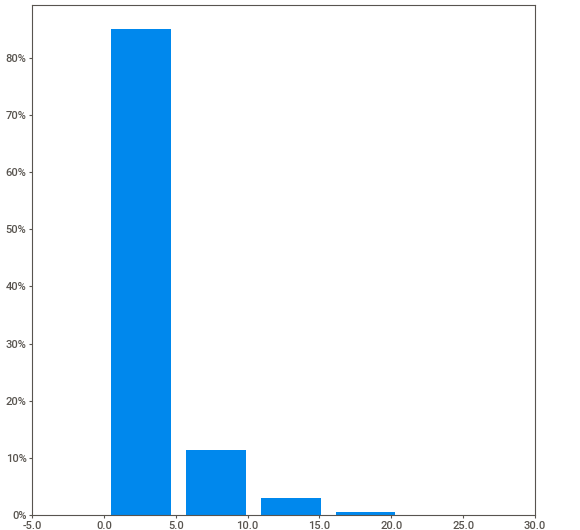
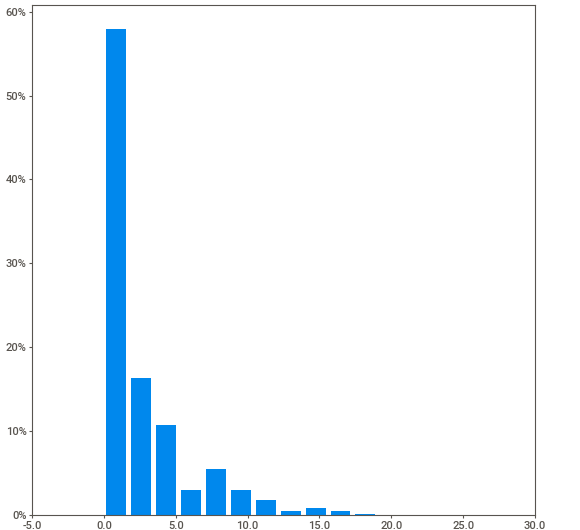
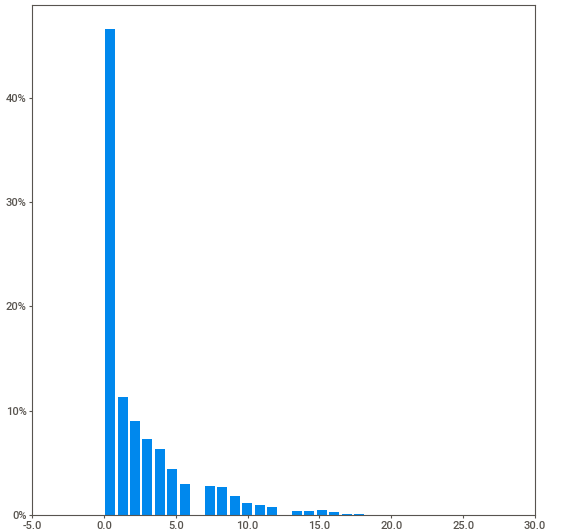
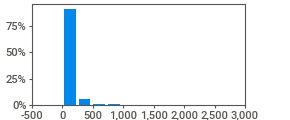
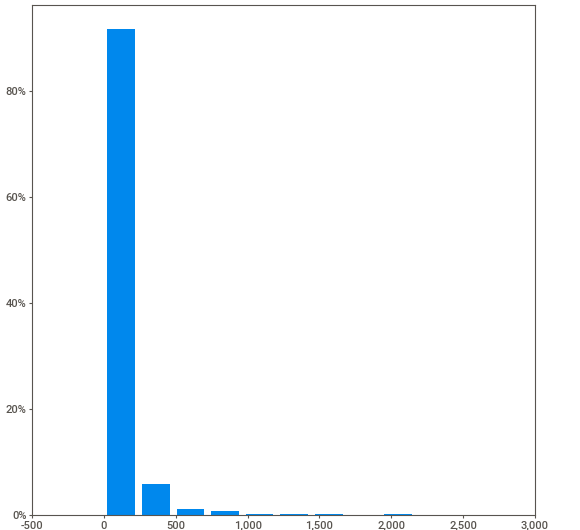
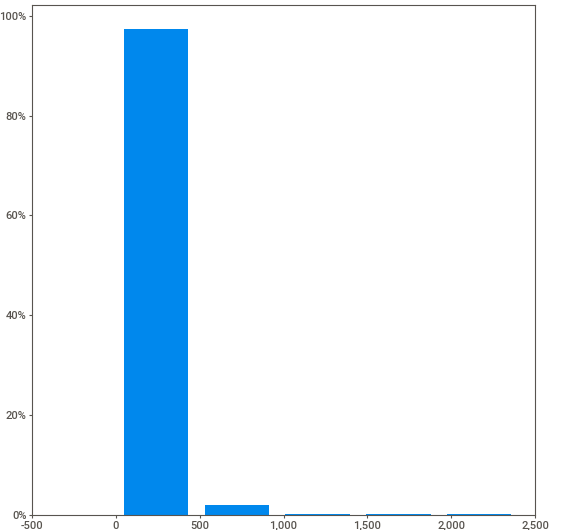
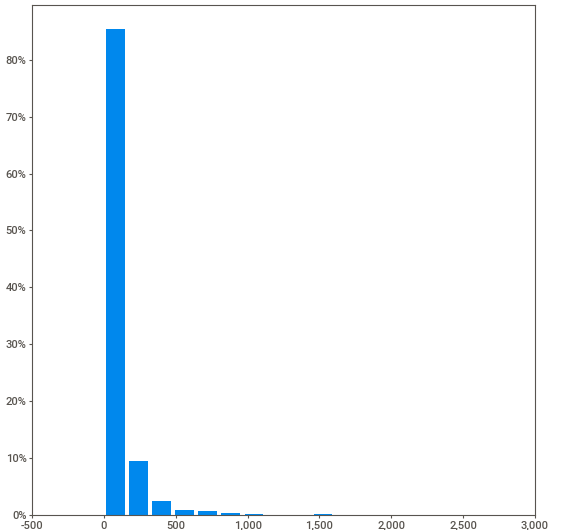
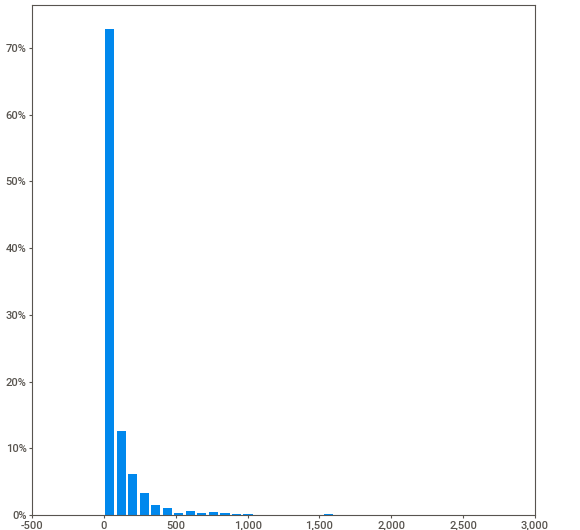
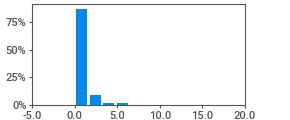
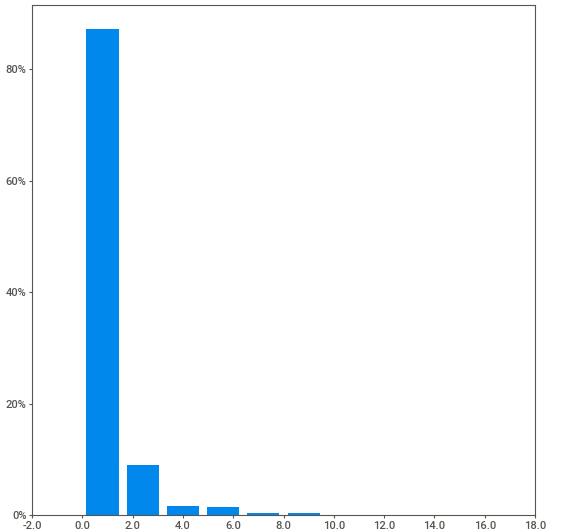
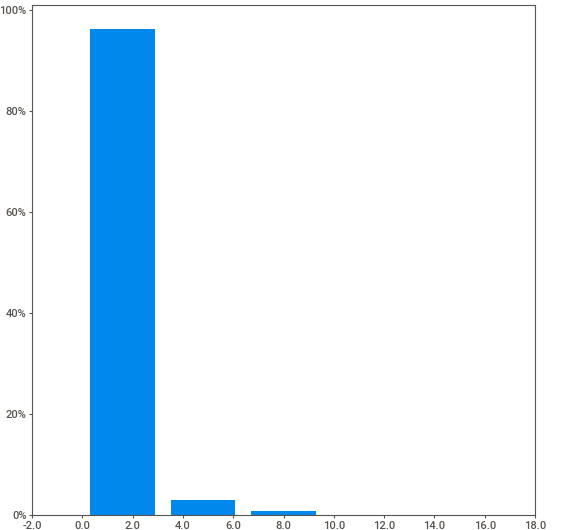
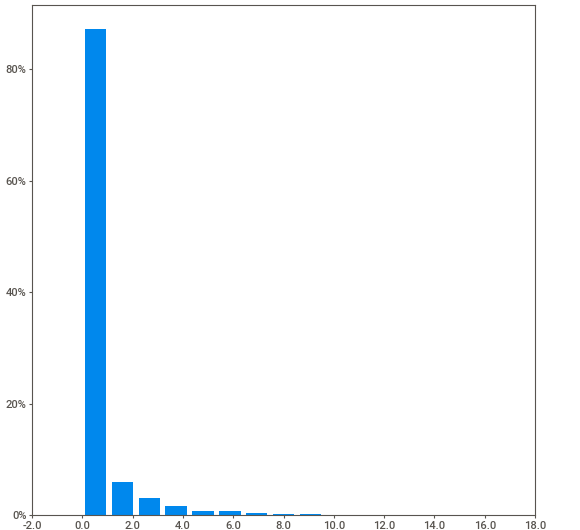
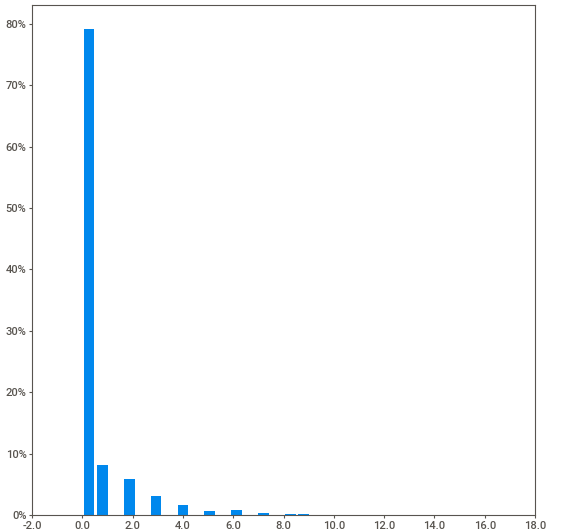
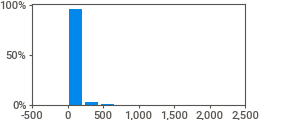
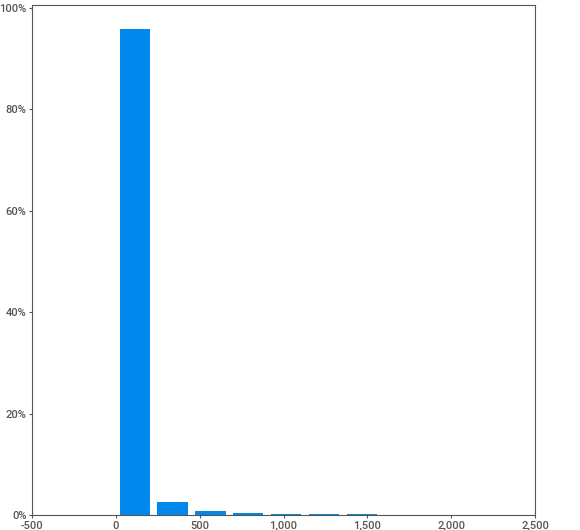
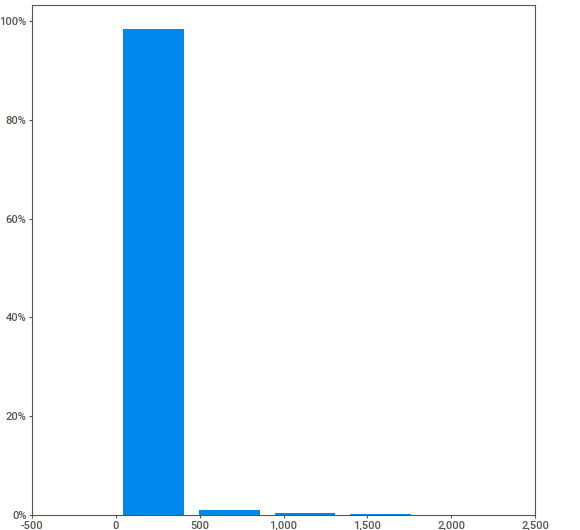
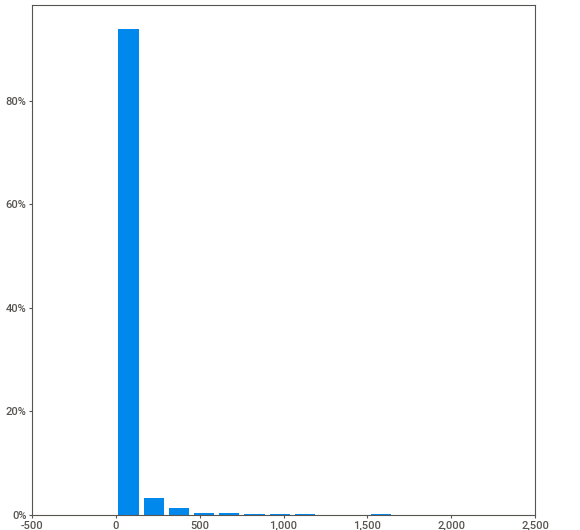
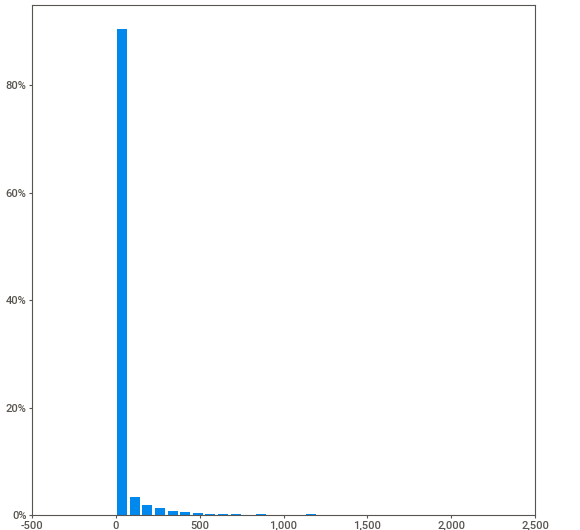
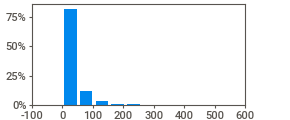
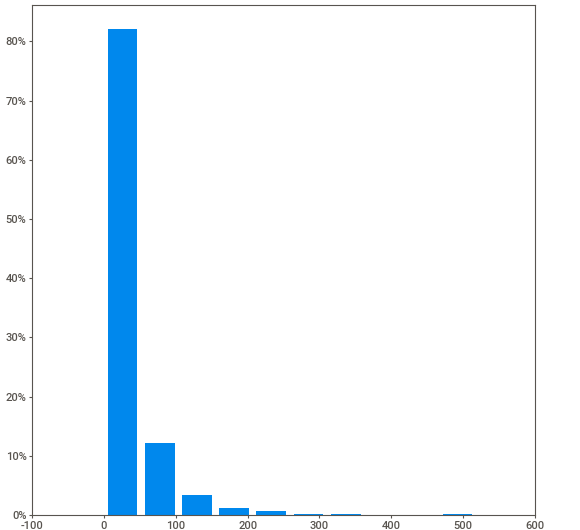
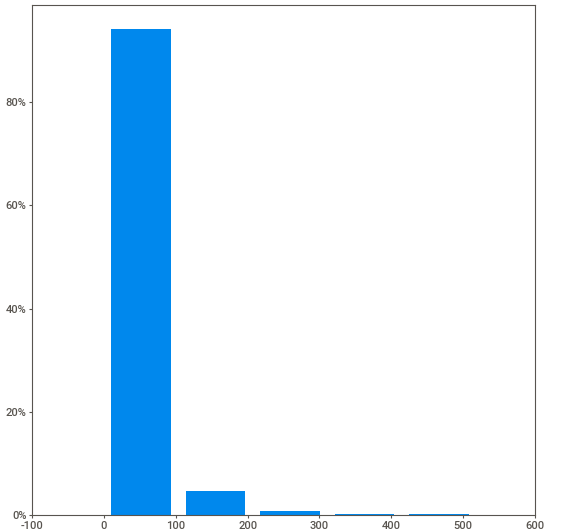
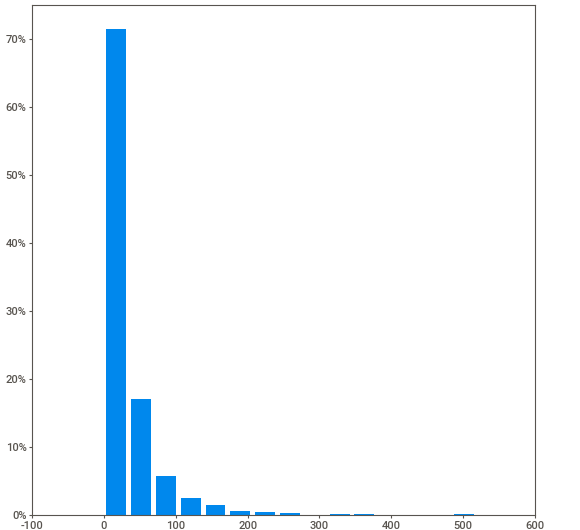
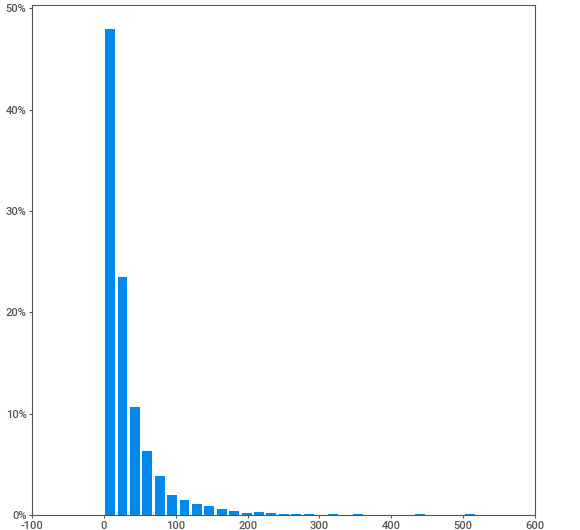
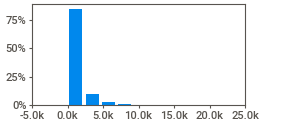
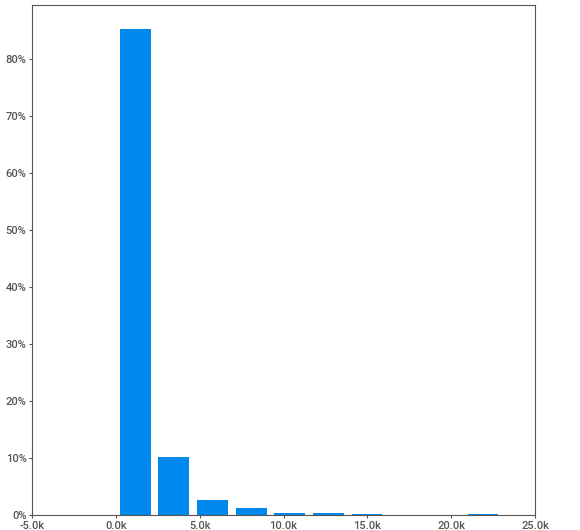
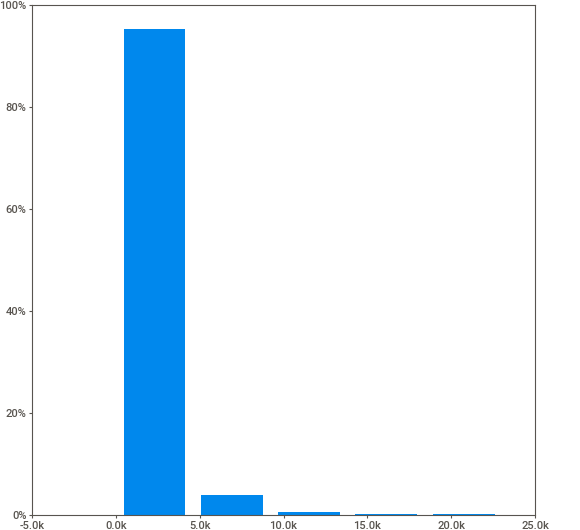
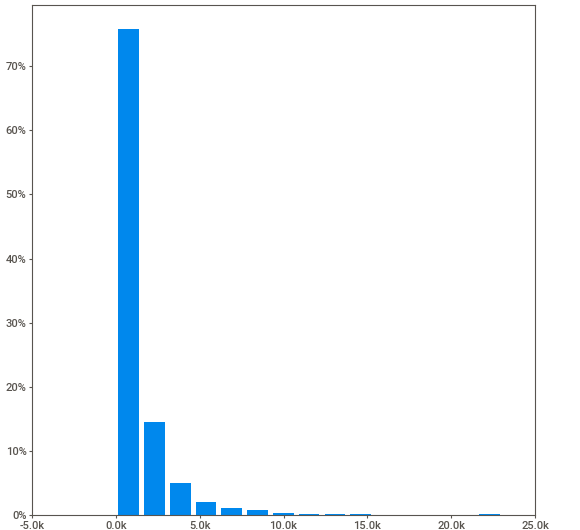
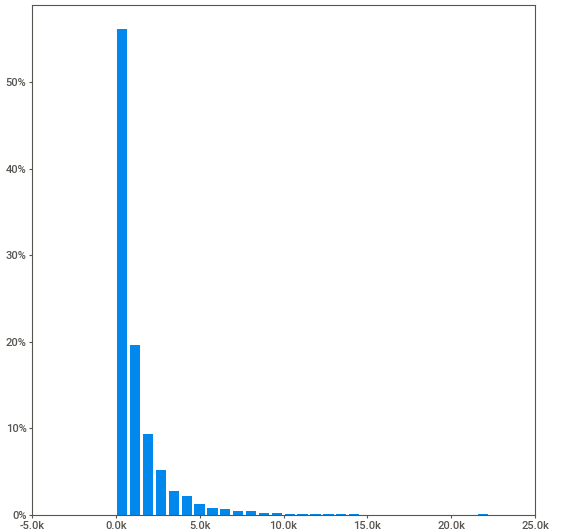
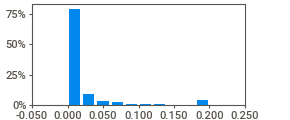
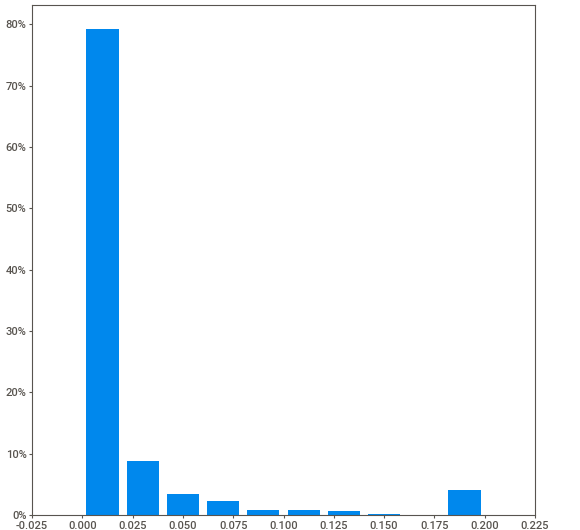
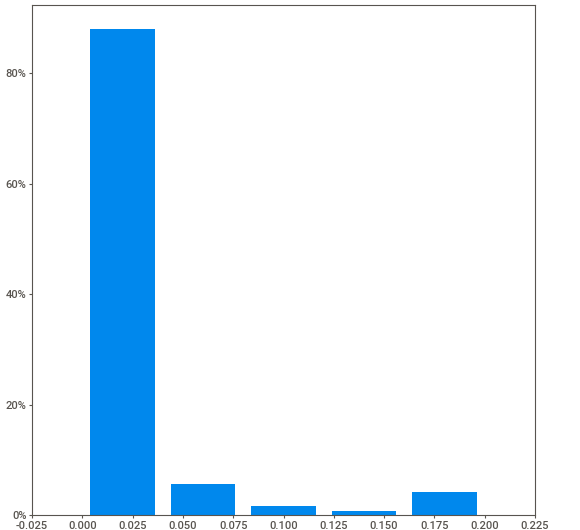
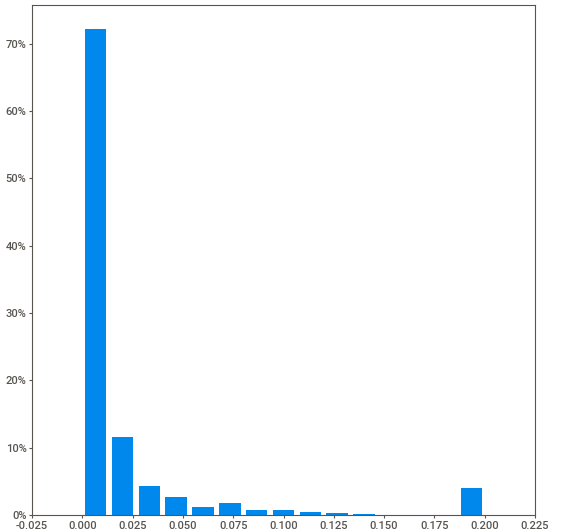
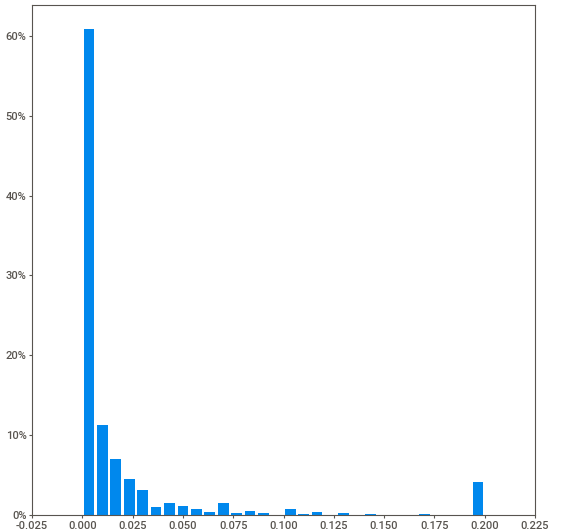
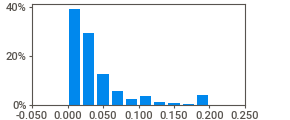
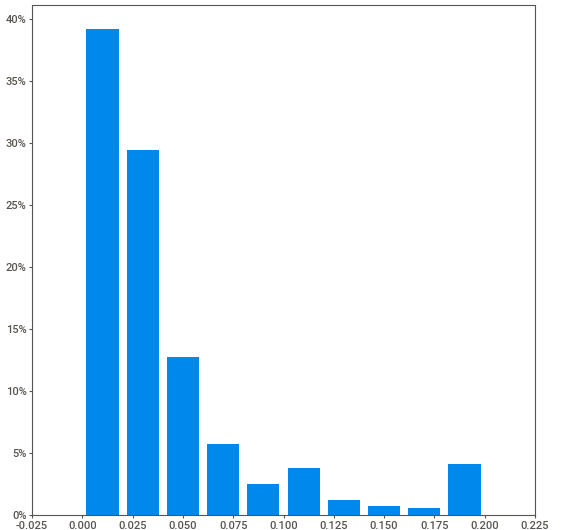
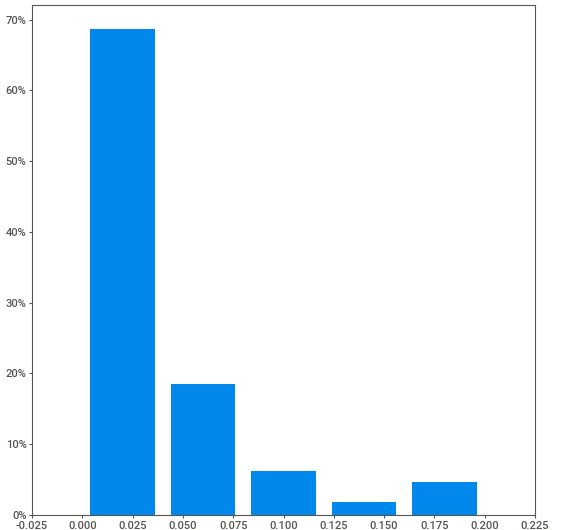
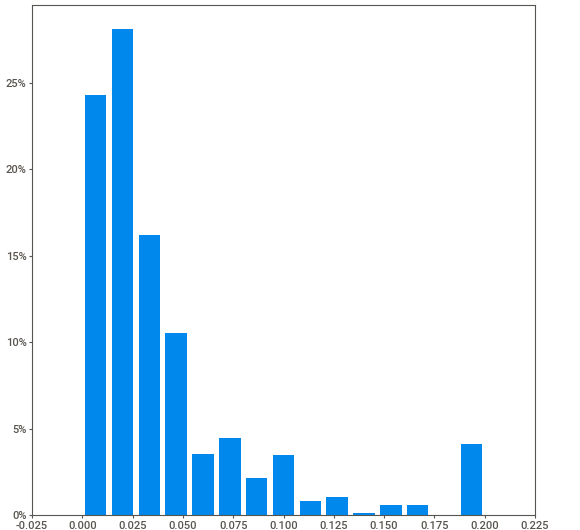
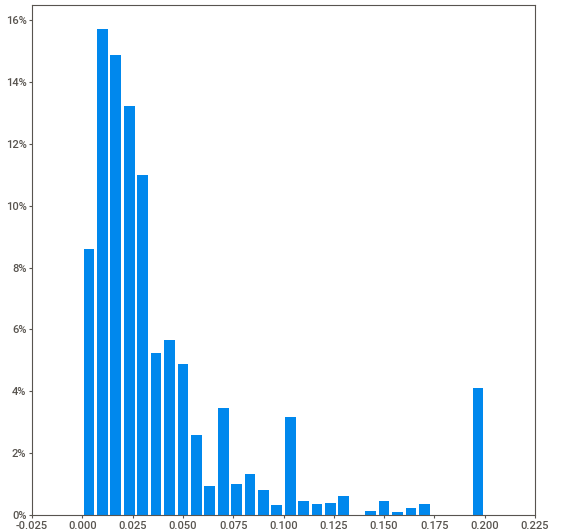
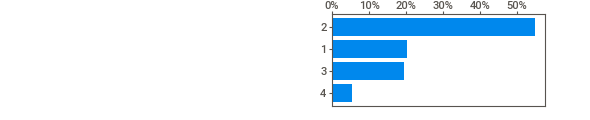
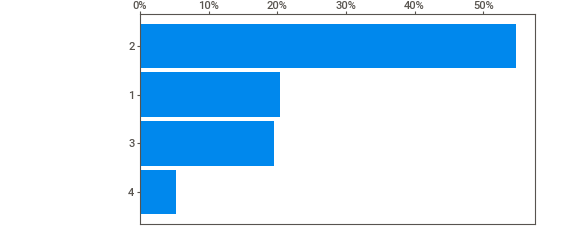
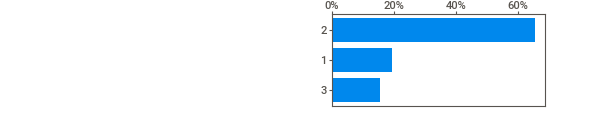
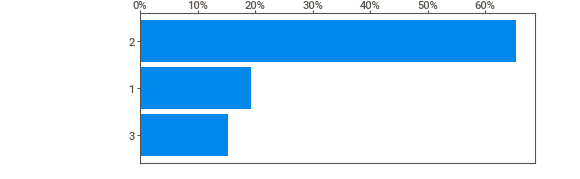
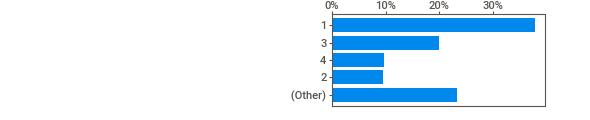
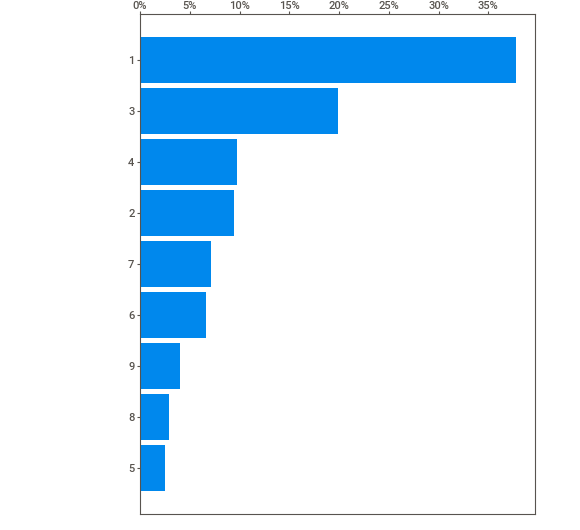
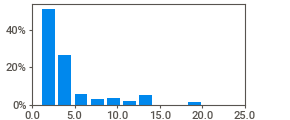
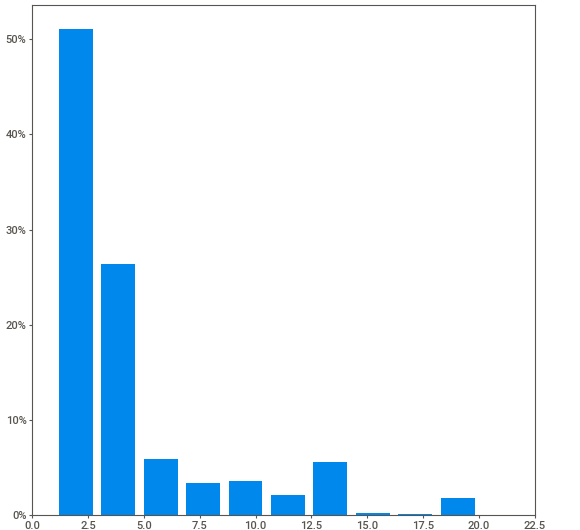
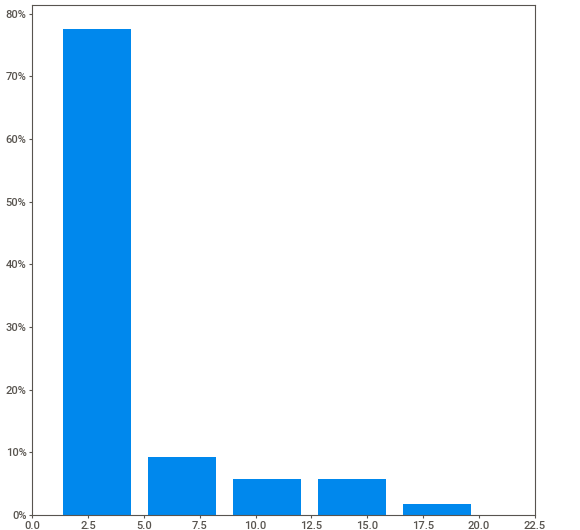
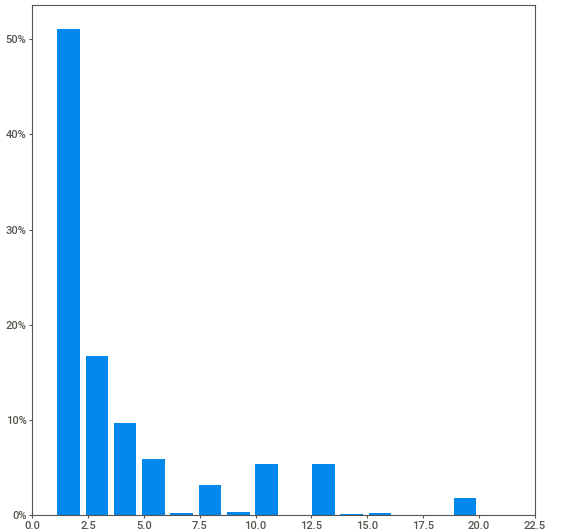
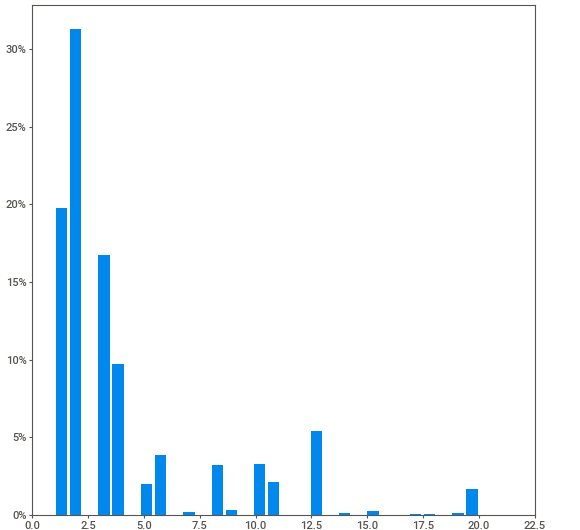
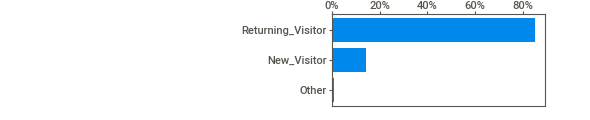
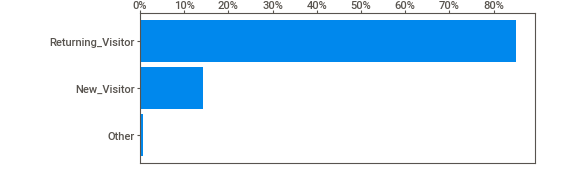
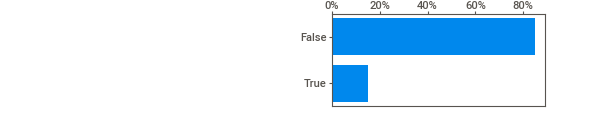
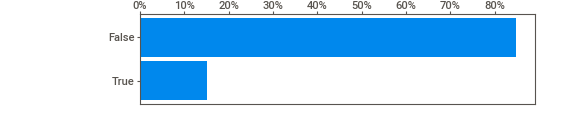
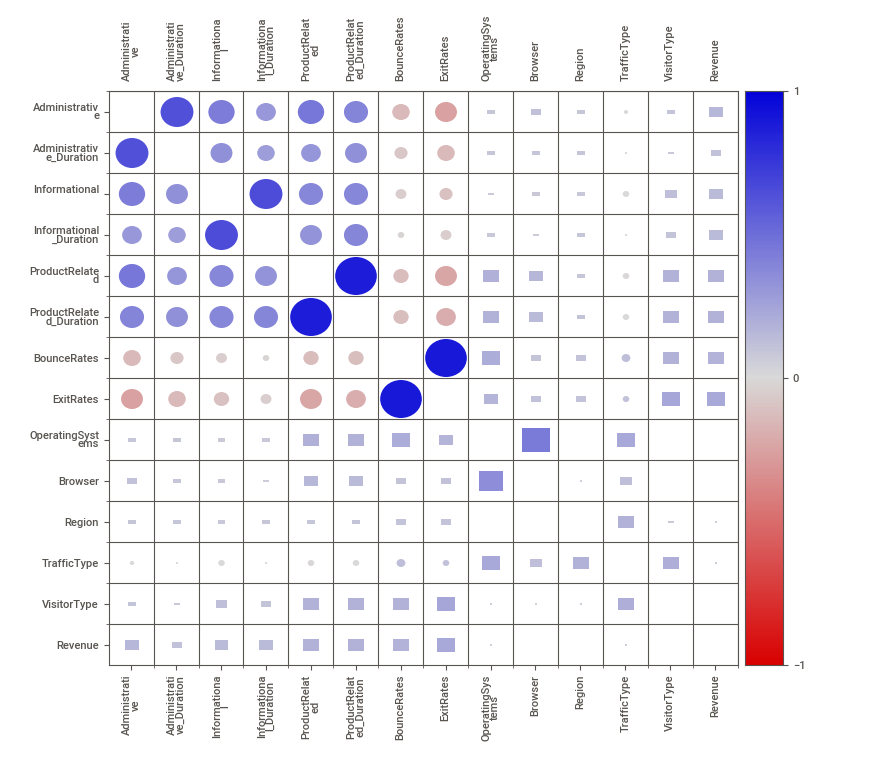
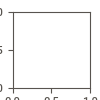

In [81]:
auto_EDA.show_notebook()

##Veo los datos que me quedaron para entrenar y para predecir el modelo

In [82]:
print("Datos para Entrenamiento: " + str(train.shape))
print("Datos para Predicciones: " + str(test.shape))

Datos para Entrenamiento: (6005, 17)
Datos para Predicciones: (3038, 14)


#Creación del modelo de clustering

In [83]:
clustering = setup(train, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(6005, 17)"
2,Transformed data shape,"(6005, 17)"
3,Numeric features,17
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,constant
8,Low variance threshold,0
9,CPU Jobs,-1


In [84]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [85]:
km = create_model('kmeans', num_clusters=4)
print(km)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5296,17350.9664,0.6018,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=123)


##Asignando al modelo

In [86]:
km_resultados = assign_model(km)
km_resultados.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue_False,Revenue_True,Cluster
0,0,0.00000,0,0.0,13,649.250000,0.0,0.015385,2,2,1,5,1,0,0,1,0,Cluster 0
1,3,96.00000,0,0.0,11,565.000000,0.0,0.011111,3,2,6,7,1,0,0,1,0,Cluster 0
2,7,133.46666,4,46.5,26,1357.833374,0.0,0.018487,3,2,9,2,1,0,0,0,1,Cluster 2
3,4,155.50000,0,0.0,13,474.833344,0.0,0.006250,3,2,1,1,0,0,1,1,0,Cluster 0
4,4,98.50000,0,0.0,9,281.750000,0.0,0.030909,1,1,3,2,0,0,1,1,0,Cluster 3


In [87]:
km_resultados.shape 

(6005, 18)

#Visualizaciones del modelo

##Visualización del codo

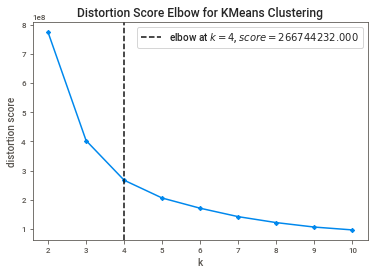

In [88]:
plot_model(km, plot = 'elbow') #el número óptimo de clusters era 4 según el método Elbow

##Visualización de la silueta

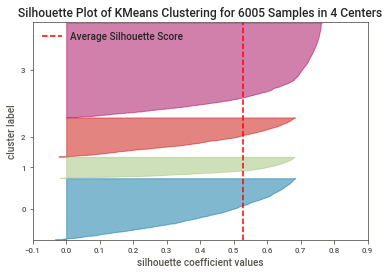

In [89]:
plot_model(km, plot = 'silhouette')

In [90]:
plot_model(km)

PyCaret agrupó las columnas en 2 PCAs, los datos están todos demasiado bien agrupados, espero que sea porque overfiteé el modelo.

##Visualización de la distribución

In [91]:
plot_model(km, plot = 'distribution') #cluster 1 y 3 son los más poblados

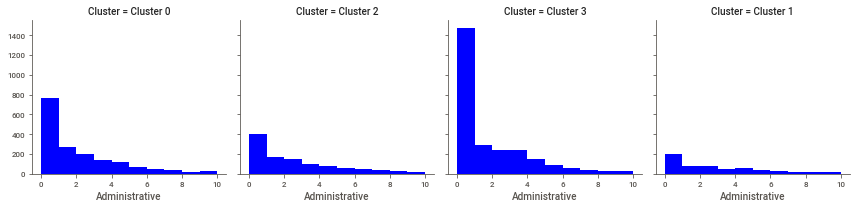

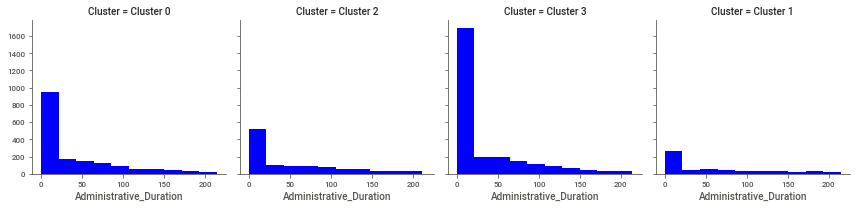

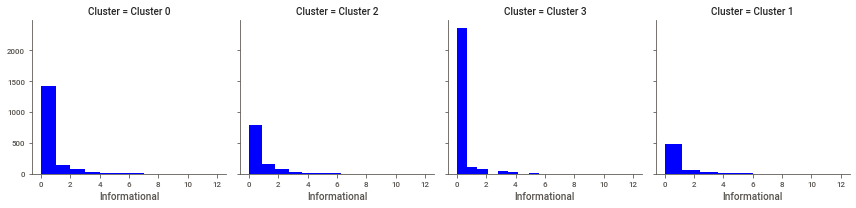

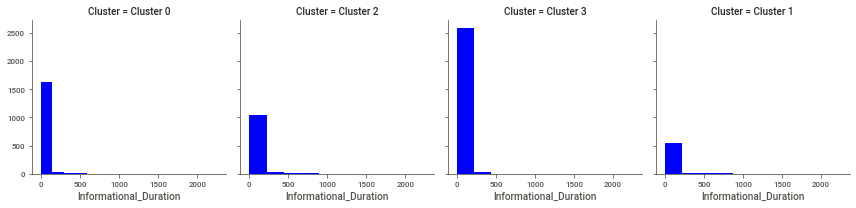

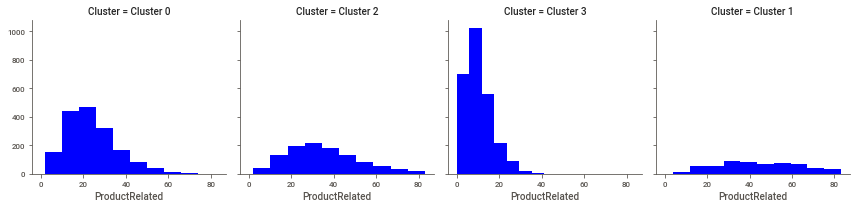

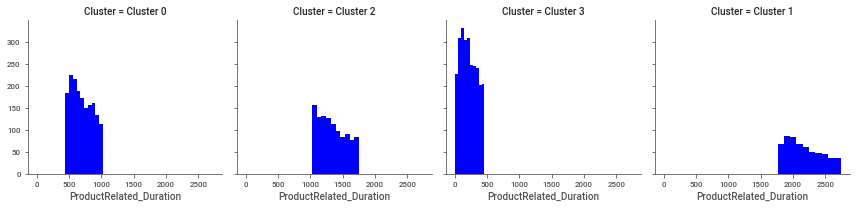

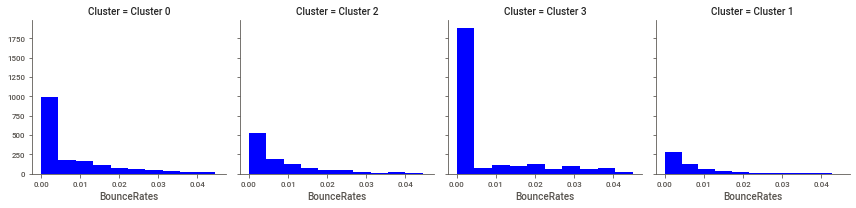

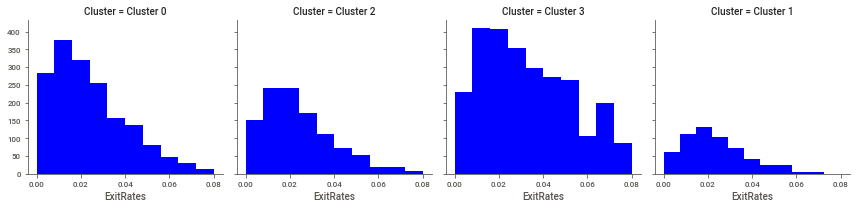

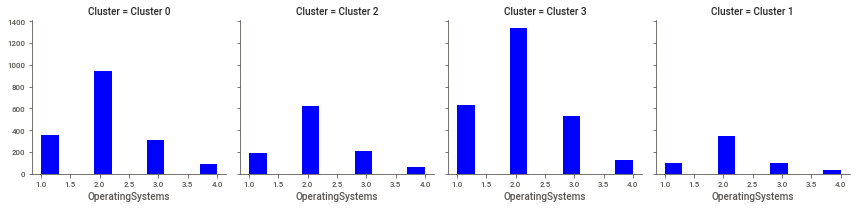

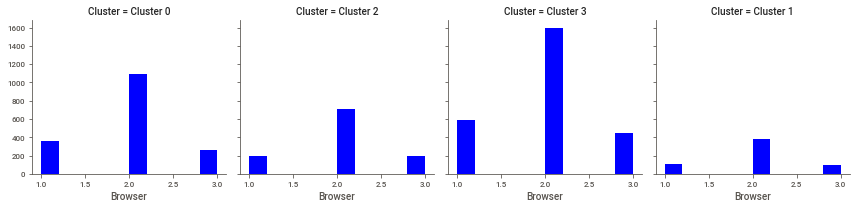

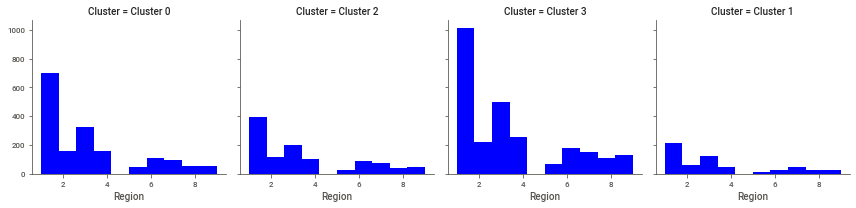

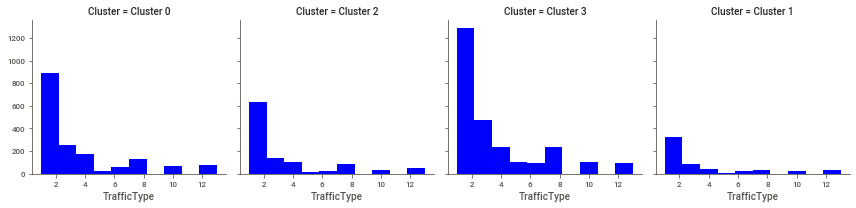

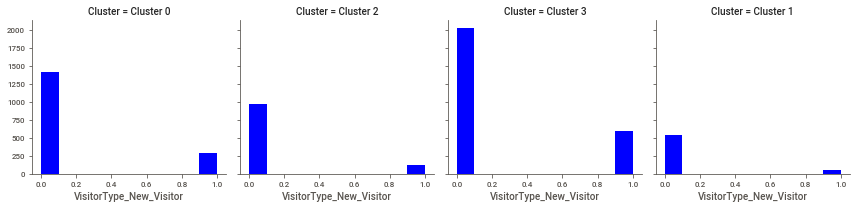

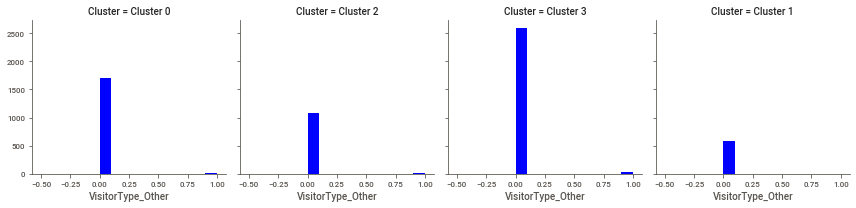

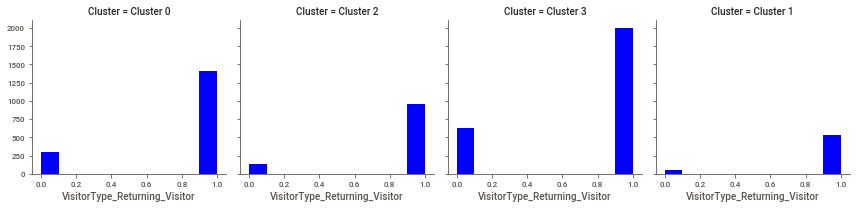

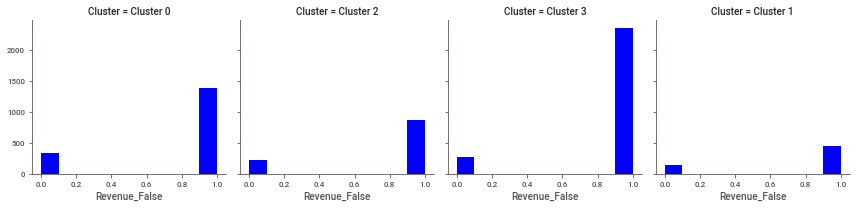

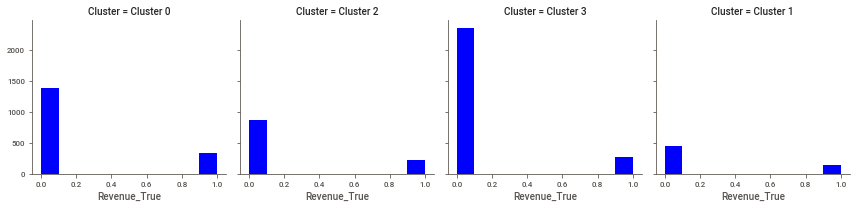

In [92]:
for i in train: #para analizar cluster por cluster
    a = sns.FacetGrid(km_resultados, col='Cluster')
    a.map(plt.hist, i, color='blue')

#Conclusiones observables sobre los datos del grupo de entrenamiento

Breves conclusiones sobre lo observado en los clústers formados.
Claramente los clústers más significativos son el clúster 3 y el 0, seguidos por el 1 y el 2.
La mayoría de los clústers se agrupan en las zonas de las regiones de la 1 a la 4 (principalmente en la 1).


Claramente nuestros esfuerzos de retención de clientes deberían enfocarse en el clúster 0 y el 3 y los de atracción de clientes o los que requieren un esfuerzo mayor de la empresa serían el clúster 1 y el 2.


En el clúster 3 tenemos la mayor incidencia de visitantes. 
Claramente son usuarios que dedican poco  tiempo a estar en nuestro sitio o en páginas relacionadas, dado que tiene claro lo que quieren aparentemente, probablemte sean consumidores informados, que ya compararon e investigaron previamente.
Concentran sus busquedas de páginas administrativas, de información y de productos. Por lo que podríamos llenarlas de banners publicitarios.
A este tipo de consumidor deberíamos llenarlo promociones o acciones rápidas de compren ya o se pierden la promo, dado que entiendo probablemente sean bastante impulsivos.
Tienen un exit rate bastante parejo por lo que entran y salen de nuestra página, no migran a otra inmediatamente.

En este clúster también encontramos el mayor flujo de nuevos visitantes, por lo que claramente se ven atraídos por nuestra oferta, pero por algún motivo no concretan el paso final.
También hay varios visitantes que aparentemente vienen de otro lado o que usan pestañas de incógnitos porque nos los podemos identificar como nuevos ni como habituales(Returning_visitor).
Deberíamos ver que tan amigable es nuestro entorno de pagos o buscar la causa por la que tenemos tan baja conversión de clientes o compras efectivas.
Me intriga esa carrito abandonado y lo que cuesta concretar las compras en la página.


A contrapunto de este segmento tenemos el clúster 1, personas que pasan un tiempo importante viendo páginas de productos en varias páginas, pero que por algún motivo no logra conectar con nuestra propuesta de valor y claramente no nos compran.
Deberíamos, en caso de querer algo con esta gente, hacer un breve estudio de mercado para encontrar las causas por las que no nos consumen.
Tienen un bajo bounce y exit rate, otro dato que nos muestra que nuestra página carece de atractividad para este segmento.

En el clúster 0 tenemos un segmento de personas que pasan poco tiempo en la web en páginas administrativas e informativas, le dedican algo de tiempo a las páginas de producto.
En este clúster tenemos un buen flujo de personas que vuelven a visitarnos en la web, de nuevo, parece que la página es atractiva, el problema va por otro lado.

Para finalizar el clúster 2 tenemos un segmento de gente que visita pocas páginas administrativas y de información (concentradas), pero que si elige variedad a la hora de ver páginas de producto, las cuáles son a las que más tiempo dedican.
La mayoría es gente que revisita la web, pero al igual que en los otros clúster no materializa compras.

Dato común a todos los clústers en que la mayoría de la gente que visita la página utiliza los browsers 1 y 2, por lo que si vamos a realizar alguna estrategia de SEO (Search Engine Optimization) y SEM (Search Engine Marketing) debería ser sobre estos buscadores.






#Predicción sobre datos de prueba (TEST)

In [93]:
test = pd.get_dummies(test, columns=['VisitorType', 'Revenue'])


In [94]:
# ValueError: Buffer dtype mismatch, expected 'double' but got 'float' me dió ese error 90 veces
# Stackoverflow me salvó las papas con la conversión de los datos a float64
# df.astype('float64')

In [95]:
test = test.astype({ #seguro hay una forma infinitamente más fácil de hacer esto pero fue la unica que me dió resultado
    'Revenue_True': 'float64',
    'Revenue_False': 'float64',
    'VisitorType_Returning_Visitor': 'float64',
    'VisitorType_Other': 'float64',
    'VisitorType_New_Visitor': 'float64',
    'TrafficType': 'float64',
    'Region': 'float64',
    'Browser': 'float64',
    'OperatingSystems':'float64',
    'Administrative': 'float64',
    'Informational': 'float64',
    'ProductRelated': 'float64'
})

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3038 entries, 0 to 3081
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 3038 non-null   float64
 1   Administrative_Duration        3038 non-null   float64
 2   Informational                  3038 non-null   float64
 3   Informational_Duration         3038 non-null   float64
 4   ProductRelated                 3038 non-null   float64
 5   ProductRelated_Duration        3038 non-null   float64
 6   BounceRates                    3038 non-null   float64
 7   ExitRates                      3038 non-null   float64
 8   OperatingSystems               3038 non-null   float64
 9   Browser                        3038 non-null   float64
 10  Region                         3038 non-null   float64
 11  TrafficType                    3038 non-null   float64
 12  VisitorType_New_Visitor        3038 non-null   f

In [97]:
kmeans_predictions = predict_model(model = km, data = test)

In [98]:
kmeans_predictions

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue_False,Revenue_True,Cluster
0,0.0,0.00,0.0,0.0,1.0,0.00,0.200000,0.200000,4.0,1.0,9.0,3.0,0.0,0.0,1.0,1.0,0.0,Cluster 3
1,1.0,0.00,0.0,0.0,0.0,0.00,0.200000,0.200000,1.0,2.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,Cluster 3
2,0.0,0.00,0.0,0.0,3.0,395.00,0.000000,0.066667,1.0,1.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,Cluster 3
3,0.0,0.00,0.0,0.0,7.0,280.50,0.000000,0.028571,1.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,Cluster 3
4,0.0,0.00,0.0,0.0,6.0,98.00,0.000000,0.066667,2.0,3.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,0.0,0.00,0.0,0.0,44.0,615.00,0.013636,0.036364,4.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,Cluster 0
3078,6.0,76.25,0.0,0.0,22.0,1075.25,0.000000,0.004167,2.0,2.0,4.0,2.0,0.0,0.0,1.0,1.0,0.0,Cluster 2
3079,0.0,0.00,1.0,0.0,16.0,503.00,0.000000,0.037647,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,Cluster 0
3080,4.0,75.00,0.0,0.0,15.0,346.00,0.000000,0.021053,2.0,2.0,3.0,11.0,0.0,0.0,1.0,1.0,0.0,Cluster 3


## Guardar el modelo

In [99]:
save_model(km,"saved_km")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Administrative',
                                              'Administrative_Duration',
                                              'Informational',
                                              'Informational_Duration',
                                              'ProductRelated',
                                              'ProductRelated_Duration',
                                              'BounceRates', 'ExitRates',
                                              'OperatingSystems', 'Browser',
                                              'Region', 'TrafficType',
                                              'VisitorType_New_Visitor',
                                              'VisitorType_Other',
                                              'VisitorType_Returning_Visitor',
                                              'Revenue_False', '